___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Графики распределений

Есть много способов изобразить распределение переменной. В этом блокноте мы рассмотрим 3 таких графика - rugplot , distplot (histogram) и kdeplot.



-----

### Важное замечание!

**Не беспокойтесь, если Ваши графики будут выглядеть немного по-другому с точки зрения цветов и стилизации. Позже мы рассмотрим, как можно поменять цвета и стили!**

----
## Данные

Мы будем использовать данные с этого сайта: http://roycekimmons.com/tools/generated_data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dm_office_sales.csv")

In [3]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   division            1000 non-null   object
 1   level of education  1000 non-null   object
 2   training level      1000 non-null   int64 
 3   work experience     1000 non-null   int64 
 4   salary              1000 non-null   int64 
 5   sales               1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


-----

## Rugplot

Очень простой график - на нём каждая точка данных отображается одной точкой на графике. На вход этой функции подаётся одномерный массив данных.  

Мы будем редко использовать этот график, поскольку он не очень нагляден на больших объёмах данных.

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='salary'>

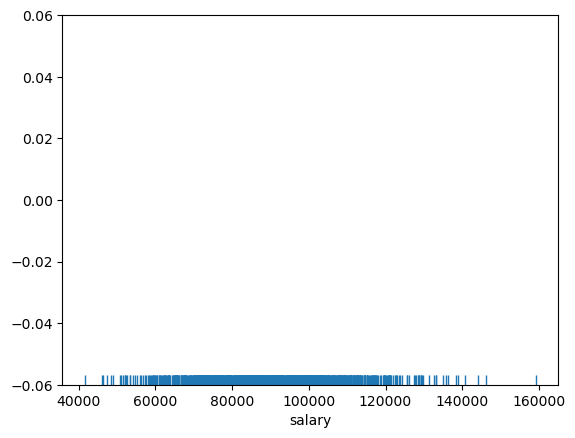

In [6]:
# Ось y по сути ничего не обозначает
# По оси X мы просто наносим точки
sns.rugplot(x='salary',data=df)

<AxesSubplot:xlabel='salary'>

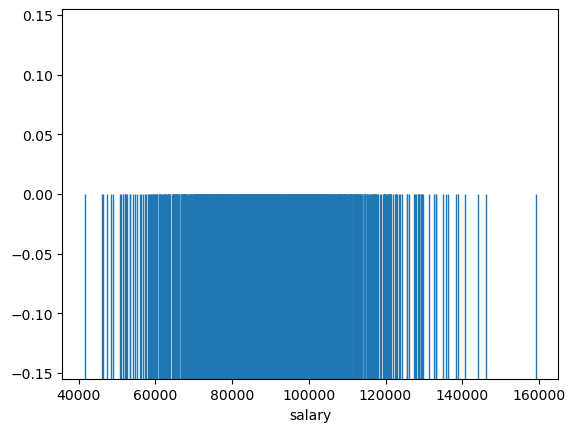

In [7]:
sns.rugplot(x='salary',data=df,height=0.5)

## displot() и histplot()  
Предыдущий rugplot не очень информативен на больших объёмах данных, поскольку отдельные точки становится сложно отделить друг от друга. Намного более практичный способ - посчитать количество точек на том или ином отрезке оси x, и на этих данных построить гистограмму.

График displot позволяет отобразить распределение одной переменной. Это гистограмма, и в качестве опции можно добавить график "KDE"  (Kernel Density Estimation) поверх этой гистограммы. Давайте рассмотрим применение и синтаксис этого метода.

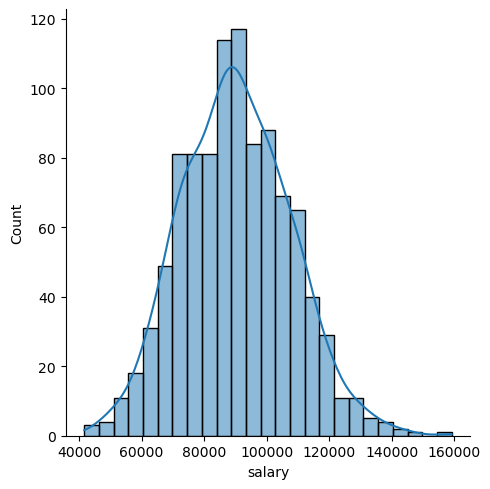

In [8]:
sns.displot(data=df,x='salary',kde=True)

Замечание - на приведённом выше графике вертикальная ось относится только к гистограмме. При этом график KDE "подгоняется" по вертикали так, чтобы он красиво располагался рядом с гистограммой. Хотя масштаб значений у KDE другой, не больше единицы. При желании можно нарисовать вторую вертикальную ось, отдельно для графика KDE. По умолчанию это не происходит, но можно сделать это самостоятельно с помощью ax.twinx()- см. пример [в ответах в этой ветке дискуссии](https://stackoverflow.com/questions/65400669/how-to-generate-two-separate-y-axes-for-a-histogram-on-the-same-figure-in-seabor).

### Посмотрим на гистограмму

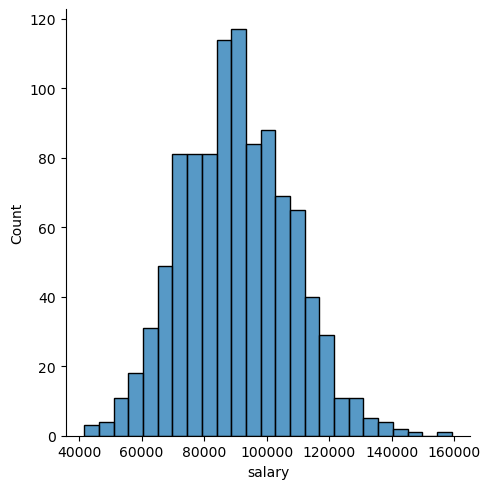

In [9]:
sns.displot(data=df,x='salary')

<AxesSubplot:xlabel='salary', ylabel='Count'>

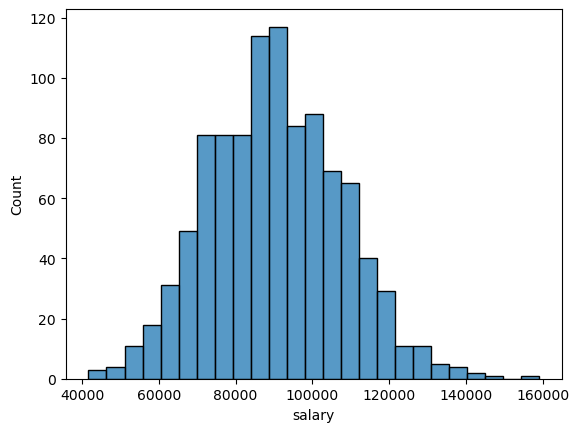

In [10]:
sns.histplot(data=df,x='salary')

### Количество отрезков (Bins)

<AxesSubplot:xlabel='salary', ylabel='Count'>

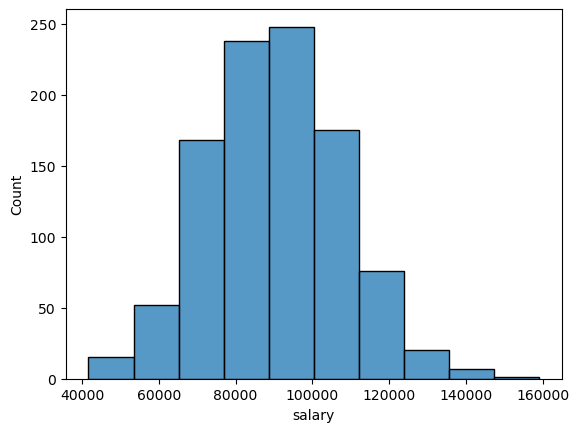

In [11]:
sns.histplot(data=df,x='salary',bins=10)

<AxesSubplot:xlabel='salary', ylabel='Count'>

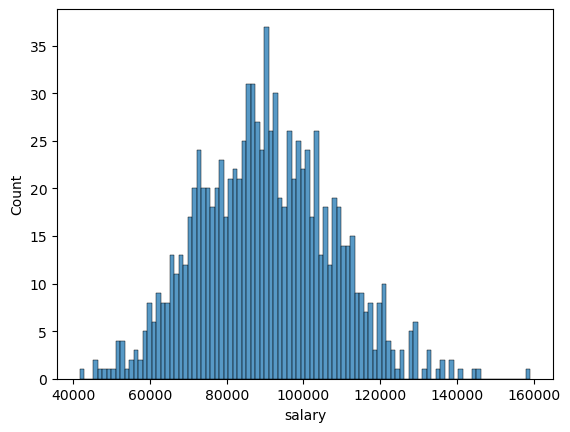

In [12]:
sns.histplot(data=df,x='salary',bins=100)

### Добавляем сетку (grid) и стилизацию

Можно указать другой стиль по умолчанию. Доступные значения: {darkgrid, whitegrid, dark, white, ticks}.

Позже мы в отдельном блокноте рассмотрим стилизацию более подробно.

<AxesSubplot:xlabel='salary', ylabel='Count'>

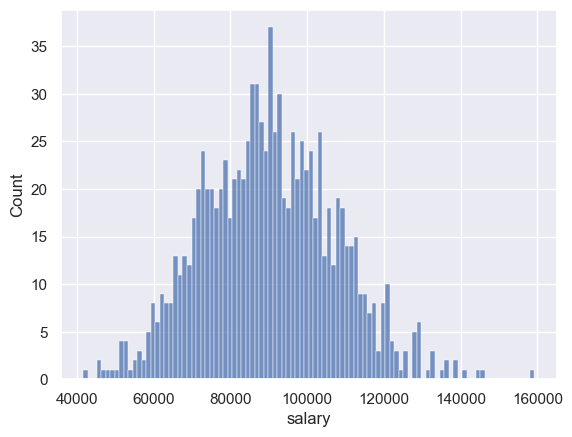

In [13]:
sns.set(style='darkgrid')
sns.histplot(data=df,x='salary',bins=100)

<AxesSubplot:xlabel='salary', ylabel='Count'>

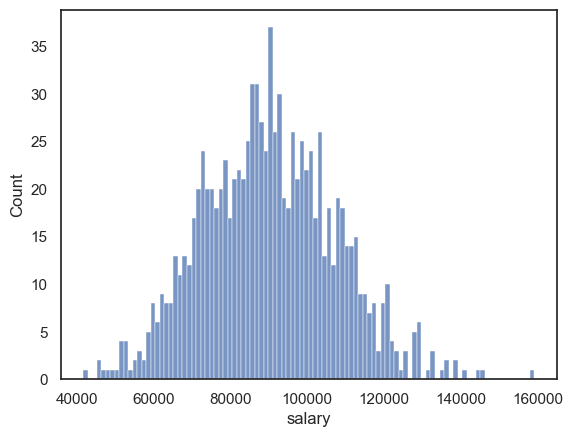

In [14]:
sns.set(style='white')
sns.histplot(data=df,x='salary',bins=100)

### Добавление именованных параметров из matplotlib

Графики Seaborn могут работать с именованными параметрами из кода matplotlib, который используется в seaborn. Не каждый график seaborn принимает на вход все параметры matplotlib, но основные параметры стилизации обычно доступны. 

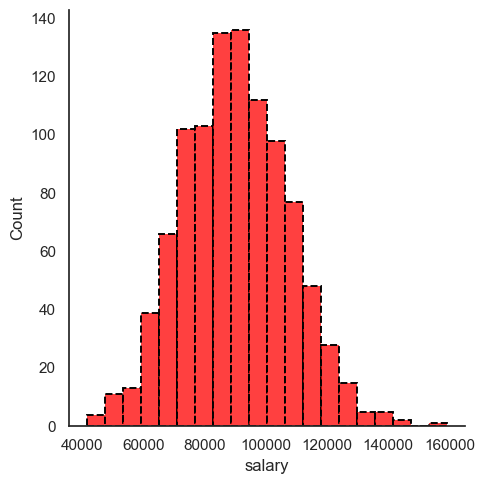

In [15]:
sns.displot(data=df,x='salary',bins=20,kde=False,
            color='red',edgecolor='black',lw=4,ls='--')

## График Kernel Density Estimation - ядерная оценка плотности

**Замечание: более детальное описание смотрите в видео-лекции.**

График KDE отображает оценку *плотности* функции некоторой случайной величины. По сути это задача сглаживания данных, где мы делаем некоторые предположения на основе ограниченного набора имеющихся данных.

Давайте построим простой пример:

In [16]:
import numpy as np

In [17]:
np.random.seed(42)

# randint выдаёт равномерно случайные числа - 
# мы получаем каждое значение возвраста с одинаковой вероятностью
# Замечание: в реальной жизни возраст почти никогда не является равномерно распределённым, 
# так что это упрощённый пример
sample_ages = np.random.randint(0,100,200)

In [18]:
sample_ages

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23, 25, 88,
       59, 40, 28, 14, 44, 64, 88, 70,  8, 87,  0,  7, 87, 62, 10, 80,  7,
       34, 34, 32,  4, 40, 27,  6, 72, 71, 11, 33, 32, 47, 22, 61, 87, 36,
       98, 43, 85, 90, 34, 64, 98, 46, 77,  2,  0,  4, 89, 13, 26,  8, 78,
       14, 89, 41, 76, 50, 62, 95, 51, 95,  3, 93, 22, 14, 42, 28, 35, 12,
       31, 70, 58, 85, 27, 65, 41, 44, 61, 56,  5, 27, 27, 43, 83, 29, 61,
       74, 91, 88, 61, 96,  0, 26, 61, 76,  2, 69, 71, 26])

In [19]:
sample_ages = pd.DataFrame(sample_ages,columns=["age"])

In [20]:
sample_ages.head()

,age
0,51
1,92
2,14
3,71
4,60


<AxesSubplot:xlabel='age'>

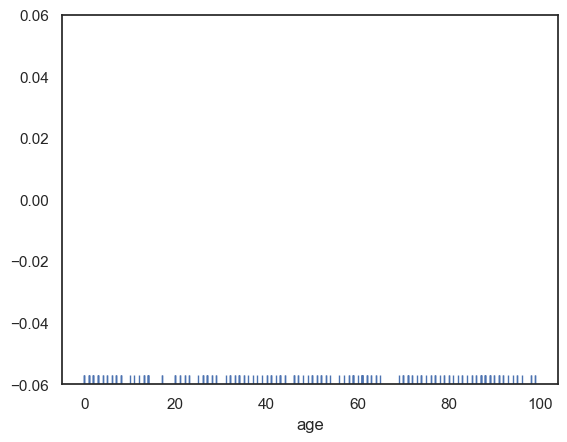

In [21]:
sns.rugplot(data=sample_ages,x='age')

<Figure size 1200x800 with 0 Axes>

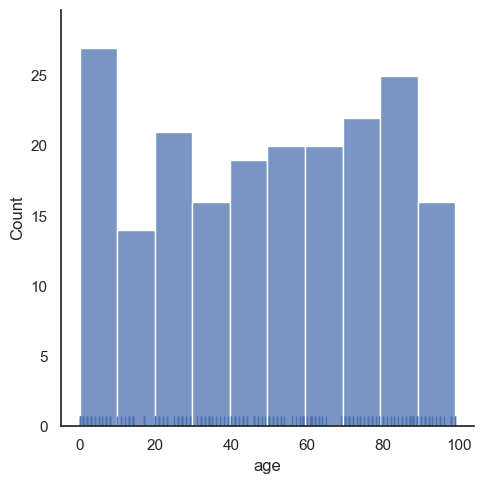

In [22]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True)

<Figure size 1200x800 with 0 Axes>

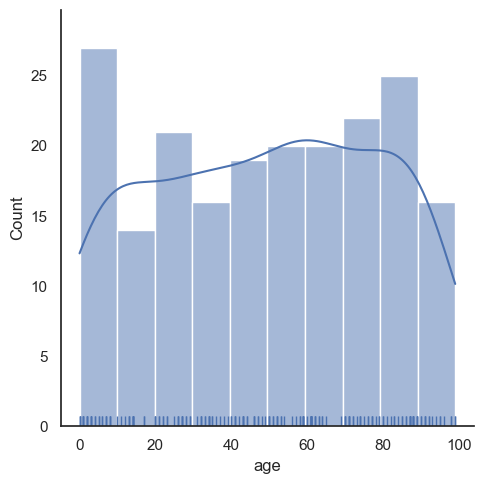

In [23]:
plt.figure(figsize=(12,8))
sns.displot(data=sample_ages,x='age',bins=10,rug=True,kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

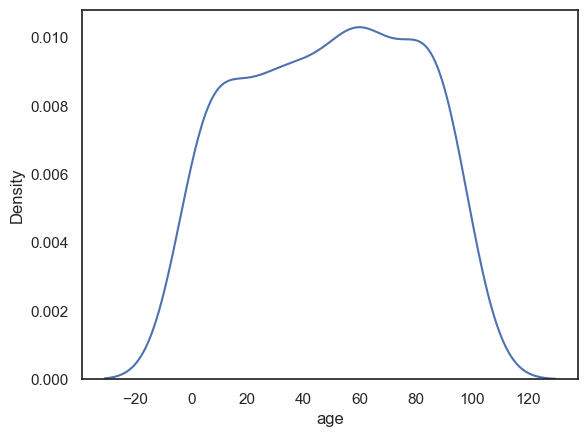

In [24]:
sns.kdeplot(data=sample_ages,x='age')

### Отбрасываем значения слева и справа KDE

Мы можем отбросить значения KDE вне заданного диапазона, Например, мы знаем, что возраст не может быть отрицательным. Также давайте скажем, что возраст не может быть больше 200.

<AxesSubplot:xlabel='age', ylabel='Density'>

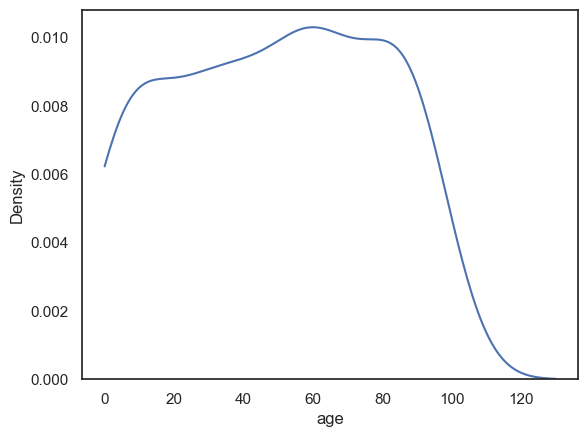

In [25]:
# plt.figure(figsize=(12,8))
sns.kdeplot(data=sample_ages,x='age',clip=[0,200])

### Ширина полосы - Bandwidth

Как мы рассказываем в видео-лекции, KDE строится на основе некоторой ядерной функции (обычно на основе базовой функции Гаусса), и мы можем сделать KDE более "чувствительным" к данным, подбирая параметр "ширина полосы" (bandwidth). При меньшем знечении ширины полосы, значения становятся более собранными по ширине. В итоге мы можем не выполнять отсечение данных слева и справа. Уменьшение ширины полосы очень похоже на увеличение количества отрезков (bins) для гистограммы, когда каждый отрезок становится всё меньше и меньше.

<AxesSubplot:xlabel='age', ylabel='Density'>

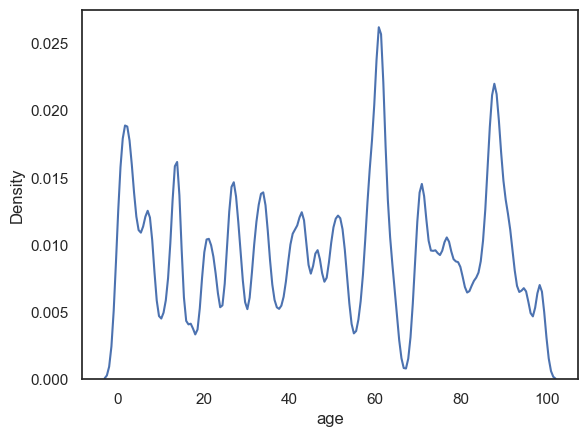

In [26]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.1)

<AxesSubplot:xlabel='age', ylabel='Density'>

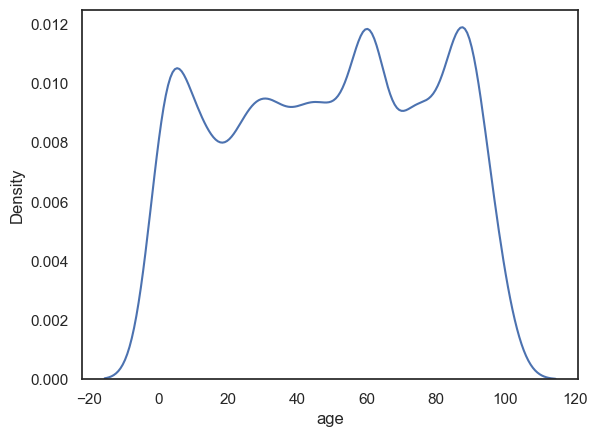

In [27]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5)

<AxesSubplot:xlabel='age', ylabel='Density'>

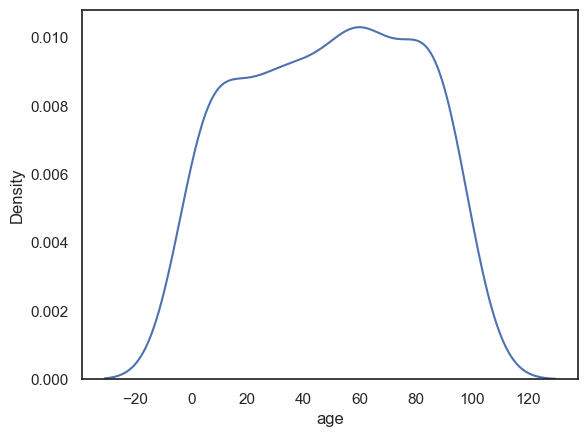

In [28]:
sns.kdeplot(data=sample_ages,x='age',bw_adjust=1)

### Стилизация

Для KDE доступны несколько базовых команд по настройке стиля.

<AxesSubplot:xlabel='age', ylabel='Density'>

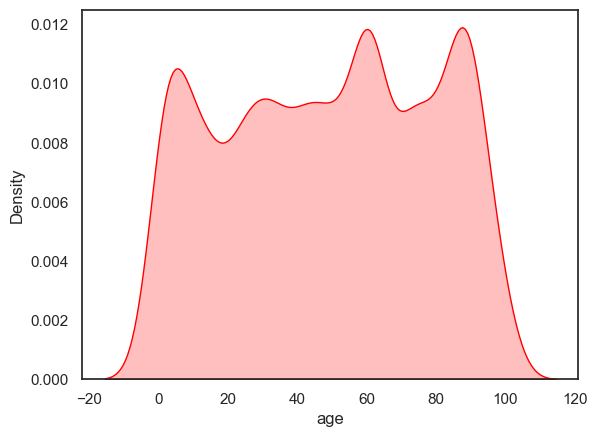

In [29]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn в методе kdeplot() вместо shade=True нужно будет указывать fill=True
#
#sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,fill=True,color='red')

sns.kdeplot(data=sample_ages,x='age',bw_adjust=0.5,shade=True,color='red')

## Двумерные графики KDE

Позже мы изучим такие графики более детально, но в двух словах - здесь мы сравниваем две непрерывные переменные, и создаём двумерный график KDE, на котором отображаем распределение с помощью той же самой функции kdeplot(). Повторимся, мы рассмотрим эту тему позже более подробно, когда будем сравнивать две переменные друг с другом.

In [30]:
random_data = pd.DataFrame(np.random.normal(0,1,size=(100,2)),columns=['x','y'])

In [31]:
random_data

,x,y
0,-1.415371,-0.420645
1,-0.342715,-0.802277
2,-0.161286,0.404051
3,1.886186,0.174578
4,0.257550,-0.074446
...,...,...
95,-0.208122,-0.493001
96,-0.589365,0.849602
97,0.357015,-0.692910
98,0.899600,0.307300


<AxesSubplot:xlabel='x', ylabel='y'>

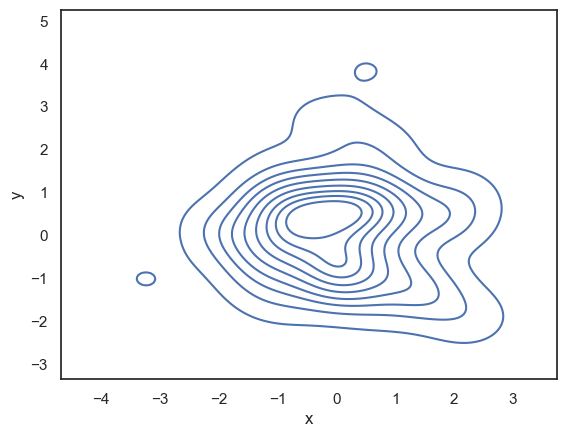

In [32]:
sns.kdeplot(data=random_data,x='x',y='y')

----
----

### Дополнительный код для визуализаций в видео-лекции

Ниже приведён тот код, который был использован для создания визуализации графика KDE в видео-лекции. Мы не будем разбирать здесь детали этого кода, поскольку он был нужен только для того, чтобы создать слайды для видео.

In [33]:
from scipy import stats

**Data**

In [34]:
np.random.seed(101)
x = np.random.normal(0, 1, size=20)

<AxesSubplot:>

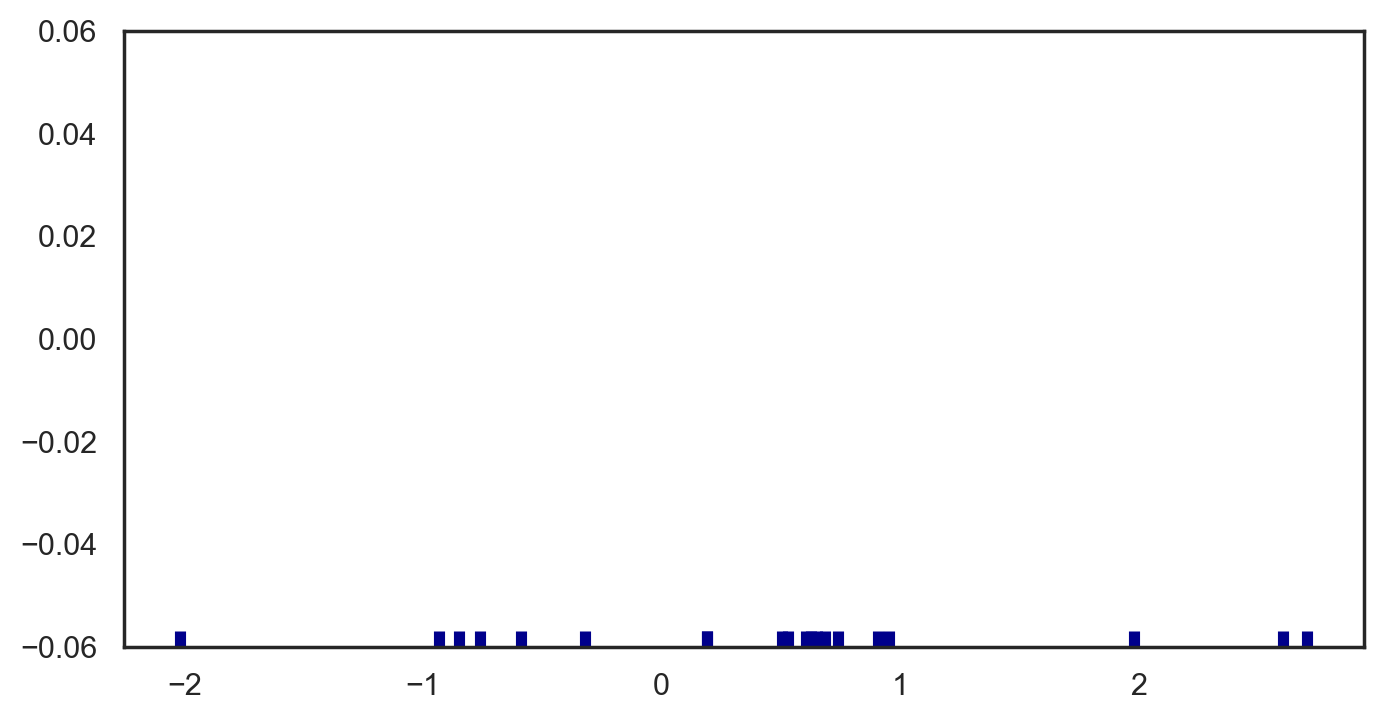

In [35]:
plt.figure(figsize=(8,4),dpi=200)
sns.rugplot(x, color="darkblue", linewidth=4)

<Figure size 1600x800 with 0 Axes>

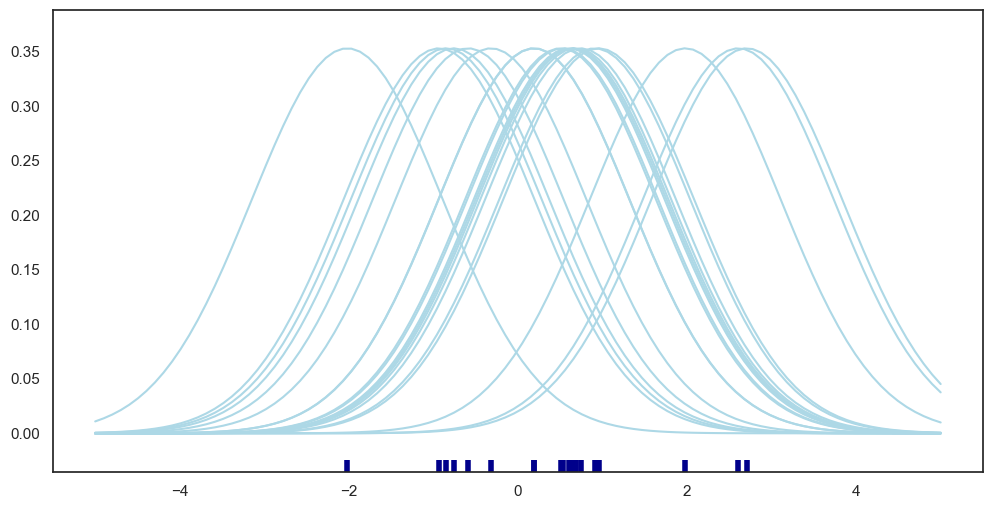

In [36]:
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

sns.rugplot(x, color="darkblue", linewidth=4);

<Figure size 1600x800 with 0 Axes>

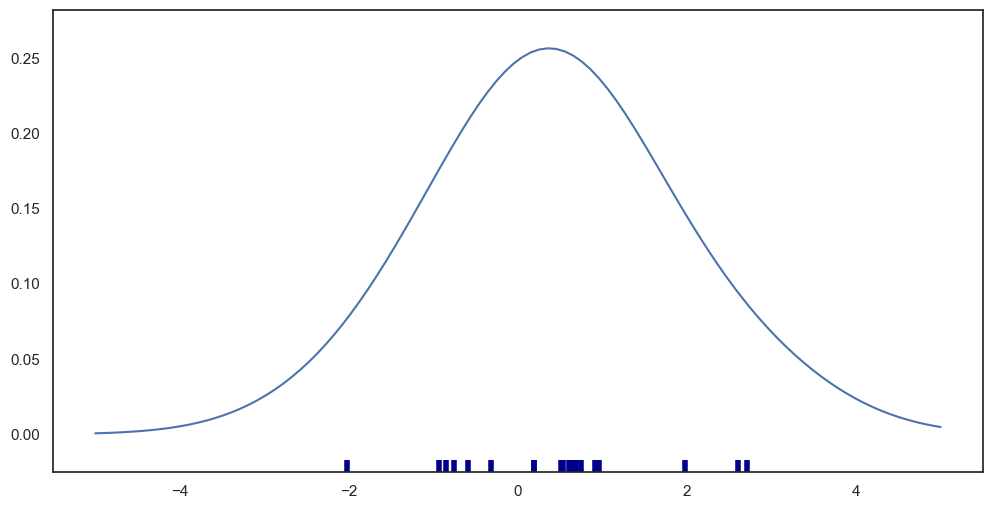

In [37]:
# ВНИМАНИЕ! В будущих версиях Scipy вместо trapz нужно будет использовать trapezoid

plt.figure(figsize=(8,4),dpi=200)
from scipy.integrate import trapz #from scipy.integrate import trapezoid
plt.figure(figsize=(12,6))
density = np.sum(kernels, axis=0)
density /= trapz(density, support) #density /= trapezoid(density, support)
plt.plot(support, density);
sns.rugplot(x, color="darkblue", linewidth=4);

<AxesSubplot:ylabel='Density'>

<Figure size 1600x800 with 0 Axes>

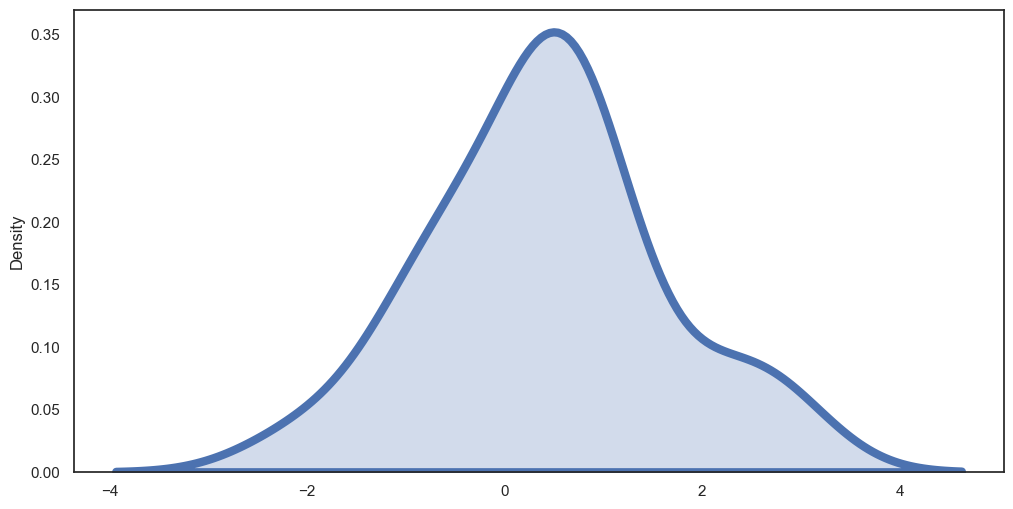

In [38]:
# ВНИМАНИЕ! В будущих версиях Scikit-Learn в методе kdeplot() вместо shade=True нужно будет указывать fill=True

plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-5, 5, 100)

kernels = []

plt.figure(figsize=(12,6))

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
#     plt.plot(support, kernel, color="lightblue")

# sns.rugplot(x, color="darkblue", linewidth=4);

sns.kdeplot(x,linewidth=6,shade=True) #sns.kdeplot(x,linewidth=6,fill=True)

---
---